In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
centralized_alphas_file = "./central_alphas.txt"
with open(centralized_alphas_file,"r") as file:
    results = json.loads(file.read())
    print(results.keys())
#     with open(centralized_alphas_file,"w") as file:
#         json.dump(results,file)

dict_keys(['Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__125, DeterministicImageNet', 'Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__125, ImageNetV2', 'Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__126, DeterministicImageNet', 'Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__126, ImageNetV2', 'Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__127, DeterministicImageNet', 'Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__127, ImageNetV2', 'Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__128, DeterministicImageNet', 'Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__128, ImageNetV2', 'Stack__.

In [19]:
def plotPredictedVsOptimalAlphaComparison(oae_model_name,stack_model_name,eval_datasets,save):
    centralized_alphas_file = "./central_alphas.txt"
    with open(centralized_alphas_file,"r") as file:
        full_alphas_dict = json.loads(file.read())
    for eval_dataset in eval_datasets:
        optimalAlphas = full_alphas_dict[f"{oae_model_name}, {eval_dataset}"]
        predictedAlphas = full_alphas_dict[f"{stack_model_name}, {eval_dataset}"]
        plt.scatter(predictedAlphas,optimalAlphas,s=1)
        plt.xlabel("Predicted Alphas")
        plt.ylabel("Optimal Alphas")
        plt.title("Predicted vs. Optimal Alphas")
#         plt.savefig(os.path.join(save, f'alpha_comparison_{eval_dataset}.png'))
        plt.show()
        plt.clf()
        
        bins = np.linspace(0, 1, 25)

        plt.hist(optimalAlphas, bins, alpha=0.5, label='opt')
        plt.hist(predictedAlphas, bins, alpha=0.5, label='pred')
        plt.legend(loc='upper right')
        plt.show()
        plt.clf()

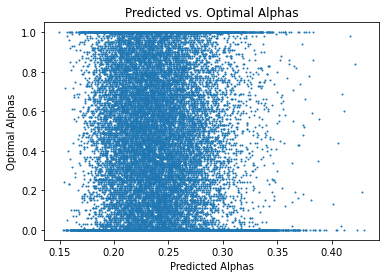

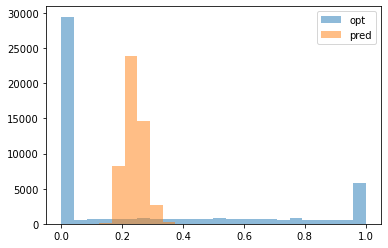

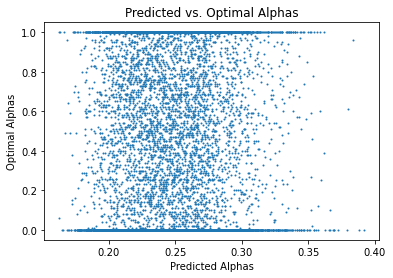

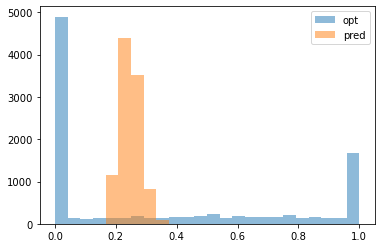

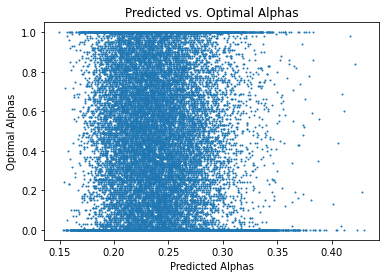

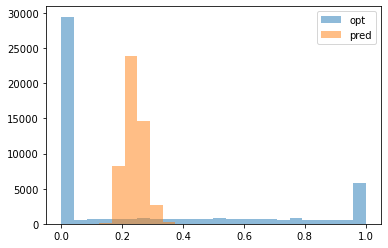

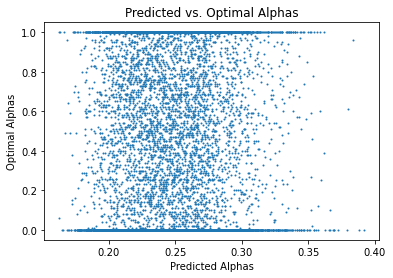

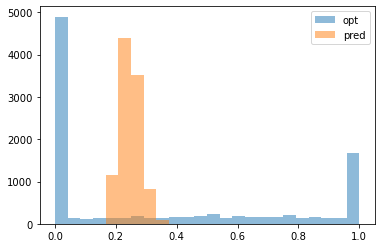

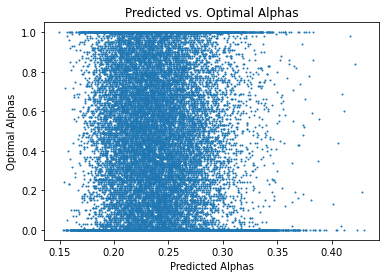

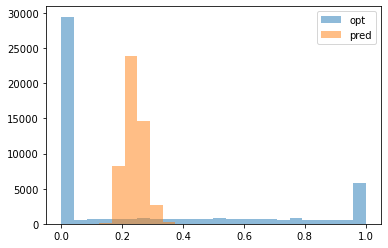

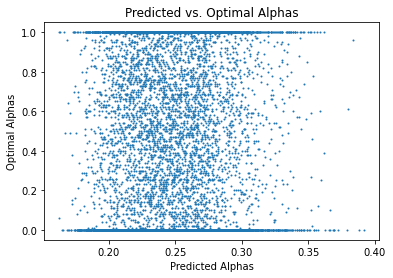

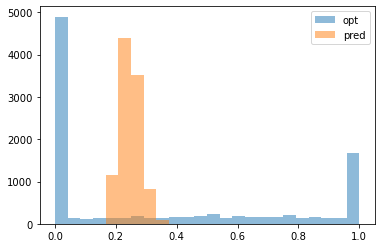

<Figure size 432x288 with 0 Axes>

In [22]:
oae_model_name = "OAE__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt"
stack_model_name = "Stack__./models/wiseft/ViTB32_8/zeroshot.pt__./models/wiseft/ViTB32_8/finetuned/checkpoint_10.pt__178"
eval_datasets = ["DeterministicImageNet","ImageNetV2"]
for runNum in [144,177,178]:
    save = f"models/wiseft/stack_ViTB32_8_DeterministicImageNet{runNum}"
    plotPredictedVsOptimalAlphaComparison(oae_model_name,stack_model_name,eval_datasets,save)